# Salary Predictions Based on Job Descriptions

For this project I had employee data that covered different jobs, salaries, education, years of experience and distance from the nearest metropolis for each employee. My objective was to build a model that would predict salary for each of the different jobs. This is how I accomplished that. 

In [2]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk

__author__ = "Chanda Dean"
__email__ = "mathstar037@gmail.com"

In [3]:
#Load data into Pandas dataframes
data_test_ft = pd.read_csv('data/test_features.csv')
data_train_ft = pd.read_csv('data/train_features.csv')
data_train_sal = pd.read_csv('data/train_salaries.csv')

In [4]:
#Check each data frames. Get a sense of what the data looks like.
data_test_ft.head(10)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362685407687,COMP33,MANAGER,HIGH_SCHOOL,NONE,HEALTH,22,73
1,JOB1362685407688,COMP13,JUNIOR,NONE,NONE,AUTO,20,47
2,JOB1362685407689,COMP10,CTO,MASTERS,BIOLOGY,HEALTH,17,9
3,JOB1362685407690,COMP21,MANAGER,HIGH_SCHOOL,NONE,OIL,14,96
4,JOB1362685407691,COMP36,JUNIOR,DOCTORAL,BIOLOGY,OIL,10,44
5,JOB1362685407692,COMP40,CTO,MASTERS,COMPSCI,FINANCE,6,23
6,JOB1362685407693,COMP32,SENIOR,MASTERS,COMPSCI,SERVICE,6,32
7,JOB1362685407694,COMP11,CEO,BACHELORS,BIOLOGY,SERVICE,9,73
8,JOB1362685407695,COMP39,MANAGER,DOCTORAL,PHYSICS,HEALTH,6,78
9,JOB1362685407696,COMP22,VICE_PRESIDENT,NONE,NONE,AUTO,23,97


In [5]:
data_train_ft.head(10)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16
5,JOB1362684407692,COMP15,MANAGER,DOCTORAL,COMPSCI,FINANCE,2,31
6,JOB1362684407693,COMP15,CFO,NONE,NONE,HEALTH,23,24
7,JOB1362684407694,COMP24,JUNIOR,BACHELORS,CHEMISTRY,EDUCATION,9,70
8,JOB1362684407695,COMP20,JANITOR,HIGH_SCHOOL,NONE,EDUCATION,1,54
9,JOB1362684407696,COMP41,VICE_PRESIDENT,BACHELORS,CHEMISTRY,AUTO,17,68


In [6]:
data_train_sal.head(10)

,jobId,salary
0,JOB1362684407687,130
1,JOB1362684407688,101
2,JOB1362684407689,137
3,JOB1362684407690,142
4,JOB1362684407691,163
5,JOB1362684407692,113
6,JOB1362684407693,178
7,JOB1362684407694,73
8,JOB1362684407695,31
9,JOB1362684407696,104


<div class="alert alert-block alert-info">
'data_train_sal' and 'data_train_features' can be merged into one data frame on the variable 'jobId'
</div>

In [6]:
# merge data frames: train_features and train_salaries

data_train = data_train_ft.merge(data_train_sal, left_on = 'jobId', right_on = 'jobId')

data_train.head(5)


,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


### Initial Data Exploration

In [36]:
# Preliminary look at data to confirm what will need to be done during data cleaning e.g. duplicates, 
# erroneous data, outliers etc

In [8]:
# Checked training data for duplicates
data_train.duplicated().sum()

0

In [37]:
# Checked test data for duplicates
data_test_ft.duplicated().sum()

0

<div class="alert alert-block alert-info">
No duplicate data in training or test data sets
</div>

In [10]:
# Check min, max, mean of numeric variables
data_train.describe()

,yearsExperience,milesFromMetropolis,salary
count,1000000.000000,1000000.000000,1000000.000000
mean,11.992386,49.529260,116.061818
std,7.212391,28.877733,38.717936
min,0.000000,0.000000,0.000000
25%,6.000000,25.000000,88.000000
50%,12.000000,50.000000,114.000000
75%,18.000000,75.000000,141.000000
max,24.000000,99.000000,301.000000


<div class="alert alert-block alert-info">
Nothing out the ordinary here, will look at a few specific test cases to check for any anomalies
</div>

In [13]:
# check unique values in string variables
data_train.jobType.unique()

array(['CFO', 'CEO', 'VICE_PRESIDENT', 'MANAGER', 'JUNIOR', 'JANITOR',
       'CTO', 'SENIOR'], dtype=object)

In [32]:
data_train.jobType.nunique()

8

In [33]:
data_train.jobType.value_counts()

SENIOR            125886
VICE_PRESIDENT    125235
MANAGER           125121
CTO               125046
JANITOR           124971
CEO               124778
JUNIOR            124594
CFO               124369
Name: jobType, dtype: int64

In [38]:
# Check sum of value_counts above. Should sum to 1000000
data_train.jobType.value_counts().sum()

1000000

In [14]:
data_train.degree.unique()

array(['MASTERS', 'HIGH_SCHOOL', 'DOCTORAL', 'BACHELORS', 'NONE'],
      dtype=object)

In [34]:
data_train.degree.nunique()

5

In [35]:
data_train.degree.value_counts()

HIGH_SCHOOL    236976
NONE           236854
BACHELORS      175495
DOCTORAL       175364
MASTERS        175311
Name: degree, dtype: int64

In [39]:
# Check sum of value_counts above. Should sum to 1000000
data_train.degree.value_counts().sum()

1000000

In [15]:
data_train.major.unique()

array(['MATH', 'NONE', 'PHYSICS', 'CHEMISTRY', 'COMPSCI', 'BIOLOGY',
       'LITERATURE', 'BUSINESS', 'ENGINEERING'], dtype=object)

In [40]:
data_train.major.nunique()

9

In [43]:
data_train.major.value_counts()

NONE           532355
CHEMISTRY       58875
LITERATURE      58684
ENGINEERING     58596
BUSINESS        58518
PHYSICS         58410
COMPSCI         58382
BIOLOGY         58379
MATH            57801
Name: major, dtype: int64

In [44]:
# Check sum of value_counts above. Should sum to 1000000
data_train.major.value_counts().sum()

1000000

In [30]:
data_train.industry.unique()

array(['HEALTH', 'WEB', 'AUTO', 'FINANCE', 'EDUCATION', 'OIL', 'SERVICE'],
      dtype=object)

In [23]:
data_train.industry.nunique()

7

In [31]:
data_train.industry.value_counts()

WEB          143206
AUTO         142943
FINANCE      142867
EDUCATION    142819
OIL          142771
HEALTH       142755
SERVICE      142639
Name: industry, dtype: int64

In [98]:
# Confirm that everyone with a highest education of 'HIGH_SCHOOL' does not have a major
data_train[data_train.degree == 'HIGH_SCHOOL'].major.unique()

array(['NONE'], dtype=object)

<div class="alert alert-block alert-info">
The frequenices of the string data check out okay. No anomalies detected.
</div>

In [51]:
# Check for outliers and see if anything needs to be remedied
# Calculate IQR for salary

Q1 = data_train['salary'].quantile(0.25)
Q3 = data_train['salary'].quantile(0.75)
IQR = Q3-Q1

upper_bound = Q3 + (1.5 * IQR)
lower_bound = Q1 - (1.5 * IQR)

print("The upper bound for salary is: ", upper_bound)
print("The lower bound for salary is: ", lower_bound)

The upper bound for salary is:  220.5
The lower bound for salary is:  8.5


In [53]:
# Check records with salary less than the lower_bound = 8.5
data_train[data_train.salary < lower_bound]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
30559,JOB1362684438246,COMP44,JUNIOR,DOCTORAL,MATH,AUTO,11,7,0
495984,JOB1362684903671,COMP34,JUNIOR,NONE,NONE,OIL,1,25,0
652076,JOB1362685059763,COMP25,CTO,HIGH_SCHOOL,NONE,AUTO,6,60,0
816129,JOB1362685223816,COMP42,MANAGER,DOCTORAL,ENGINEERING,FINANCE,18,6,0
828156,JOB1362685235843,COMP40,VICE_PRESIDENT,MASTERS,ENGINEERING,WEB,3,29,0


<div class="alert alert-block alert-info">
There are five records with a salary of 0. Given that they are all employees and most are at the mangerial level they should all have a salary > 0. Removing these records should not negatively affect the data.</div>

In [65]:
# Check records with salary greater than the upper_bound = 220.5
upper_outliers = data_train[data_train.salary > upper_bound]

upper_outliers.sort_values('salary').tail(10)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
377196,JOB1362684784883,COMP5,CEO,DOCTORAL,ENGINEERING,WEB,20,8,290
884902,JOB1362685292589,COMP1,CTO,MASTERS,BUSINESS,FINANCE,24,2,292
47203,JOB1362684454890,COMP18,CEO,BACHELORS,BUSINESS,FINANCE,22,18,292
503962,JOB1362684911649,COMP3,CEO,DOCTORAL,PHYSICS,OIL,24,1,293
905713,JOB1362685313400,COMP35,CEO,DOCTORAL,BUSINESS,FINANCE,16,17,293
293221,JOB1362684700908,COMP44,CEO,DOCTORAL,ENGINEERING,OIL,19,18,294
911747,JOB1362685319434,COMP3,CEO,BACHELORS,BUSINESS,FINANCE,24,28,294
572777,JOB1362684980464,COMP60,CEO,MASTERS,ENGINEERING,OIL,22,1,298
400611,JOB1362684808298,COMP45,CFO,DOCTORAL,ENGINEERING,OIL,23,3,301
685562,JOB1362685093249,COMP47,CTO,MASTERS,ENGINEERING,OIL,24,0,301


In [72]:
upper_outliers.sort_values('yearsExperience').head(20)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
60050,JOB1362684467737,COMP27,CEO,DOCTORAL,ENGINEERING,OIL,0,41,227
131150,JOB1362684538837,COMP35,CEO,BACHELORS,BUSINESS,FINANCE,0,11,221
675479,JOB1362685083166,COMP14,CEO,DOCTORAL,ENGINEERING,OIL,1,5,223
974802,JOB1362685382489,COMP8,CEO,DOCTORAL,BUSINESS,FINANCE,1,78,223
671941,JOB1362685079628,COMP48,CEO,DOCTORAL,ENGINEERING,OIL,2,34,229
61355,JOB1362684469042,COMP22,CFO,DOCTORAL,ENGINEERING,OIL,2,1,226
500076,JOB1362684907763,COMP12,CEO,MASTERS,ENGINEERING,OIL,2,1,222
674163,JOB1362685081850,COMP8,CEO,MASTERS,ENGINEERING,OIL,3,48,225
489248,JOB1362684896935,COMP7,CEO,MASTERS,ENGINEERING,OIL,3,9,231
279404,JOB1362684687091,COMP41,CFO,MASTERS,BUSINESS,FINANCE,3,6,232


<div class="alert alert-block alert-info">
Looking at 'yearsExperience' I can see that the records are for people in upper management and all work in Oil or Finance where salaries tend to be high. All in all, the records in the upper bound all appear to be ok. Nothing needs to be removed. </div>

In [7]:
# remove records with salary = 0 from training data
data_train = data_train[data_train.salary != 0]

# Confirmation the records have been removed
data_train.sort_values('salary').head(10)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
141942,JOB1362684549629,COMP27,JANITOR,NONE,NONE,EDUCATION,0,98,17
188931,JOB1362684596618,COMP26,JANITOR,HIGH_SCHOOL,NONE,EDUCATION,1,96,18
807108,JOB1362685214795,COMP29,JANITOR,HIGH_SCHOOL,NONE,EDUCATION,0,92,18
482429,JOB1362684890116,COMP46,JANITOR,NONE,NONE,EDUCATION,0,92,18
798142,JOB1362685205829,COMP38,JANITOR,NONE,NONE,EDUCATION,0,75,19
207218,JOB1362684614905,COMP20,JANITOR,HIGH_SCHOOL,NONE,EDUCATION,0,81,19
477468,JOB1362684885155,COMP52,JANITOR,NONE,NONE,EDUCATION,0,91,19
677635,JOB1362685085322,COMP61,JANITOR,NONE,NONE,EDUCATION,0,96,19
60556,JOB1362684468243,COMP23,JANITOR,NONE,NONE,EDUCATION,1,93,19
981967,JOB1362685389654,COMP28,JANITOR,NONE,NONE,EDUCATION,0,92,19


### ---- 4 Explore the data (EDA) ----

In [3]:
#summarize each feature variable
#summarize the target variable
#look for correlation between each feature and the target
#look for correlation between features

In [33]:
# Check that removing the data that had salary = 0 has not caused major changes to the desciptive 
# statistics for the data
data_train.describe()

,yearsExperience,milesFromMetropolis,salary
count,999995.000000,999995.000000,999995.000000
mean,11.992407,49.529381,116.062398
std,7.212390,28.877721,38.717163
min,0.000000,0.000000,17.000000
25%,6.000000,25.000000,88.000000
50%,12.000000,50.000000,114.000000
75%,18.000000,75.000000,141.000000
max,24.000000,99.000000,301.000000


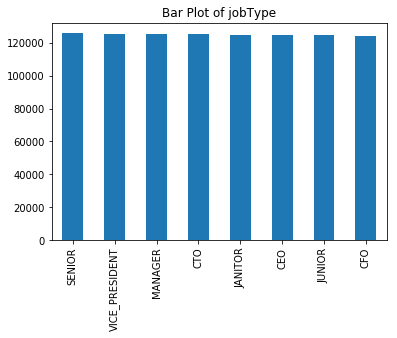

In [11]:
data_train.jobType.value_counts().plot(kind='bar', title='Bar Plot of jobType')

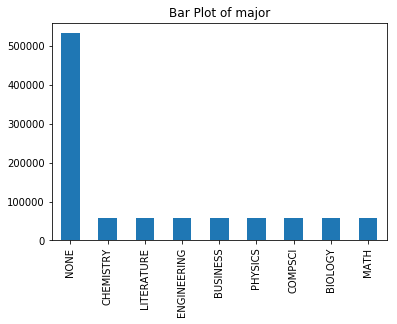

In [12]:
data_train.major.value_counts().plot(kind='bar', title='Bar Plot of major')

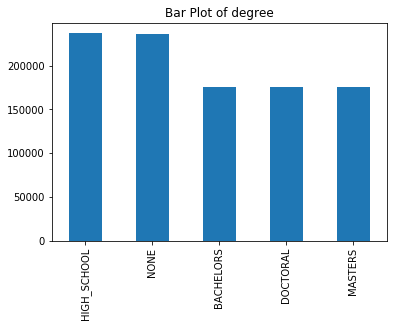

In [15]:
data_train.degree.value_counts().plot(kind='bar', title = 'Bar Plot of degree')

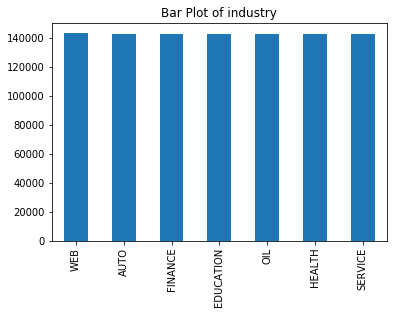

In [16]:
data_train.industry.value_counts().plot(kind='bar', title='Bar Plot of industry')

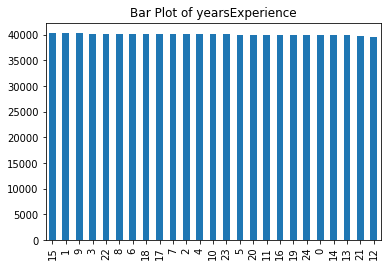

In [31]:
data_train.yearsExperience.value_counts().plot(kind='bar', title='Bar Plot of yearsExperience')

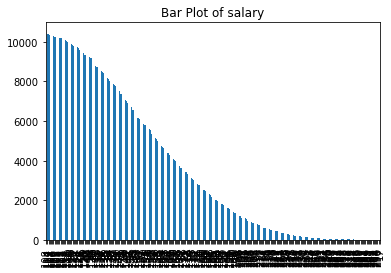

In [18]:
data_train.salary.value_counts().plot(kind='bar', title='Bar Plot of salary')

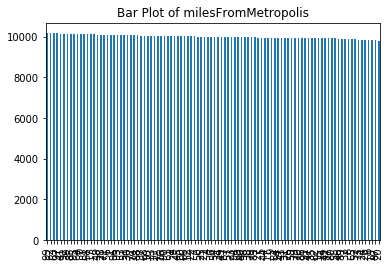

In [22]:
data_train.milesFromMetropolis.value_counts().plot(kind='bar', title='Bar Plot of milesFromMetropolis')

### ---- 5 Establish a baseline ----

In [5]:
#select a reasonable metric (MSE in this case)
#create an extremely simple model and measure its efficacy
#e.g. use "average salary" for each industry as your model and then measure MSE
#during 5-fold cross-validation

### ---- 6 Hypothesize solution ----

In [ ]:
#brainstorm 3 models that you think may improve results over the baseline model based
#on your 

Brainstorm 3 models that you think may improve results over the baseline model based on your EDA and explain why they're reasonable solutions here.

Also write down any new features that you think you should try adding to the model based on your EDA, e.g. interaction variables, summary statistics for each group, etc

## Part 3 - DEVELOP

You will cycle through creating features, tuning models, and training/validing models (steps 7-9) until you've reached your efficacy goal

#### Your metric will be MSE and your goal is:
 - <360 for entry-level data science roles
 - <320 for senior data science roles

### ---- 7 Engineer features  ----

In [ ]:
#make sure that data is ready for modeling
#create any new features needed to potentially enhance model

### ---- 8 Create models ----

In [15]:
#create and tune the models that you brainstormed during part 2

### ---- 9 Test models ----

In [1]:
#do 5-fold cross validation on models and measure MSE

### ---- 10 Select best model  ----

In [ ]:
#select the model with the lowest error as your "prodcuction" model

## Part 4 - DEPLOY

### ---- 11 Automate pipeline ----

In [ ]:
#write script that trains model on entire training set, saves model to disk,
#and scores the "test" dataset

### ---- 12 Deploy solution ----

In [16]:
#save your prediction to a csv file or optionally save them as a table in a SQL database
#additionally, you want to save a visualization and summary of your prediction and feature importances
#these visualizations and summaries will be extremely useful to business stakeholders

### ---- 13 Measure efficacy ----

We'll skip this step since we don't have the outcomes for the test data